In [3]:
# https://github.com/sdv-dev/CTGAN

import os
import matplotlib.pyplot as plt

import pandas as pd

from CTGan.ctgan import CTGAN
print(os.getcwd())

d:\PhD2016_acer\01. Workspaces\fbEvasionMetrics\AdvFailureCurves


# Load Data

In [6]:
strFileName =  r'../DATA/Kyoto2015DS.csv'
dfKyoto = pd.read_csv(strFileName, delimiter=',')

print(dfKyoto.shape)
print(dfKyoto.groupby('label').size())
#print(dfKyoto.head(5))

(60000, 14)
label
0    30000
1    30000
dtype: int64


In [ ]:
dfRealData = 

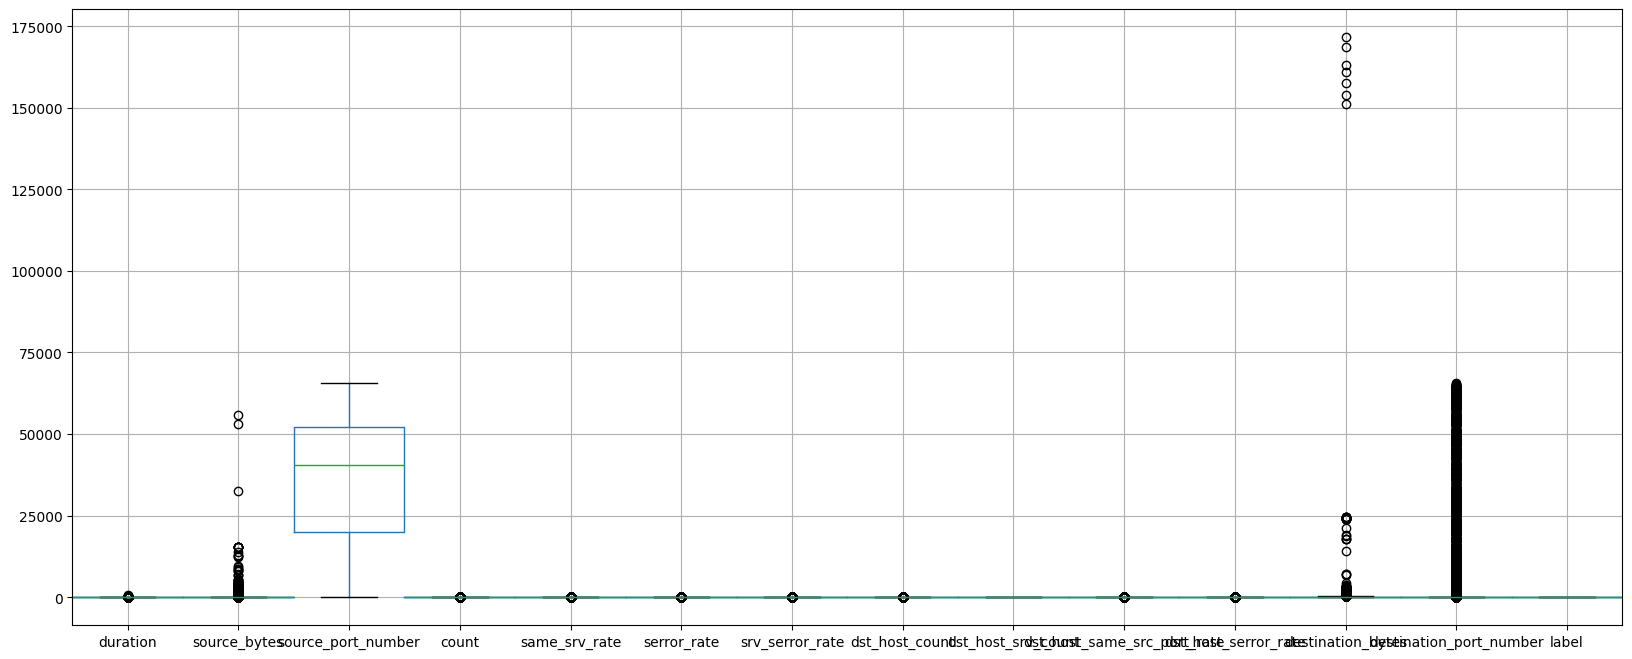

In [5]:
dfKyoto.boxplot(figsize = (20, 8), widths = 1)
plt.show()

# Generate Synthetic Data

In [ ]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dfRealData, )

# Create synthetic data
dfSynData = ctgan.sample(100)
print(dfSynData.shape)
print(dfSynData.head(5))

(100, 15)
   age    workclass  fnlwgt  education  education-num      marital-status  \
0   50      Private  205436    Masters             12  Married-civ-spouse   
1   63      Private   87039  Doctorate             12           Separated   
2   33      Private  229851    HS-grad              5  Married-civ-spouse   
3   40  Federal-gov  246700    HS-grad             16            Divorced   
4   31      Private  248820    HS-grad             13  Married-civ-spouse   

     occupation    relationship   race     sex  capital-gain  capital-loss  \
0  Craft-repair       Own-child  White  Female            78            -1   
1  Adm-clerical   Not-in-family  White    Male            89             2   
2         Sales   Not-in-family  White    Male           112            -2   
3         Sales  Other-relative  White  Female          5142            -3   
4         Sales         Husband  White  Female           -27            -1   

   hours-per-week native-country income  
0              4